GroupGal : 83093
StellarMasses : 114662
EnvMeasures : 67996
EnvMeasures : 56228
visualMorph : 38795
['CATAID', 'ELLIPTICAL', 'ELLIPTICAL_CODE', 'HUBBLE_TYPE_SPD', 'HUBBLE_TYPE_SPD_CODE', 'HUBBLE_TYPE_LSK', 'HUBBLE_TYPE_LSK_CODE', 'HUBBLE_TYPE_ASGR', 'HUBBLE_TYPE_ASGR_CODE', 'HUBBLE_TYPE', 'HUBBLE_TYPE_CODE', 'ASGR_DISTURBED', 'ASGR_NORMAL', 'ASGR_UNSURE', 'ASGR_CLASSIFIERS', 'ASGR_PROBDIST', 'P_EL', 'P_CS', 'P_EL_DEBIASED', 'P_CS_DEBIASED', 'URL_IMG']


Joining envMeasures VisualMorph 5446
5446
['CATAID', 'RA', 'Dec', 'Z', 'Rpetro', 'DM_100_25_75', 'SURVEY_CODE', 'SigErr', 'GroupID', 'RankIterCen', 'SepIterCen', 'CoSepIterCen', 'AngSepIterCen', 'RankBCG', 'SepBCG', 'CoSepBCG', 'AngSepBCG', 'RankCen', 'SepCen', 'CoSepCen', 'AngSepCen', 'ELLIPTICAL', 'ELLIPTICAL_CODE', 'HUBBLE_TYPE_SPD', 'HUBBLE_TYPE_SPD_CODE', 'HUBBLE_TYPE_LSK', 'HUBBLE_TYPE_LSK_CODE', 'HUBBLE_TYPE_ASGR', 'HUBBLE_TYPE_ASGR_CODE', 'HUBBLE_TYPE', 'HUBBLE_TYPE_CODE', 'ASGR_DISTURBED', 'ASGR_NORMAL', 'ASGR_UNSURE', 'ASGR_CLASSIFIERS', 'ASGR_PROBDIST', 'P_EL', 'P_CS', 'P_EL_DEBIASED', 'P_CS_DEBIASED', 'URL_IMG', 'logmstar']
GroupMass
['GroupID', 'logmstar']
LocalGroupsSumMass
['CATAID', 'RA', 'Dec', 'Z', 'Rpetro', 'DM_100_25_75', 'SURVEY_CODE', 'SigErr', 'GroupID', 'RankIterCen', 'SepIterCen', 'CoSepIterCen', 'AngSepIterCen', 'RankBCG', 'SepBCG', 'CoSepBCG', 'AngSepBCG', 'RankCen', 'SepCen', 'CoSepCen', 'AngSepCen', 'ELLIPTICAL', 'ELLIPTICAL_CODE', 'HUBBLE_TYPE_SPD', 'HUBBL

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:375: UserWarning: `bins` cannot be 'auto' when using weights. Setting `bins=10`, but you will likely want to adjust.
  warnings.warn(msg, UserWarning)


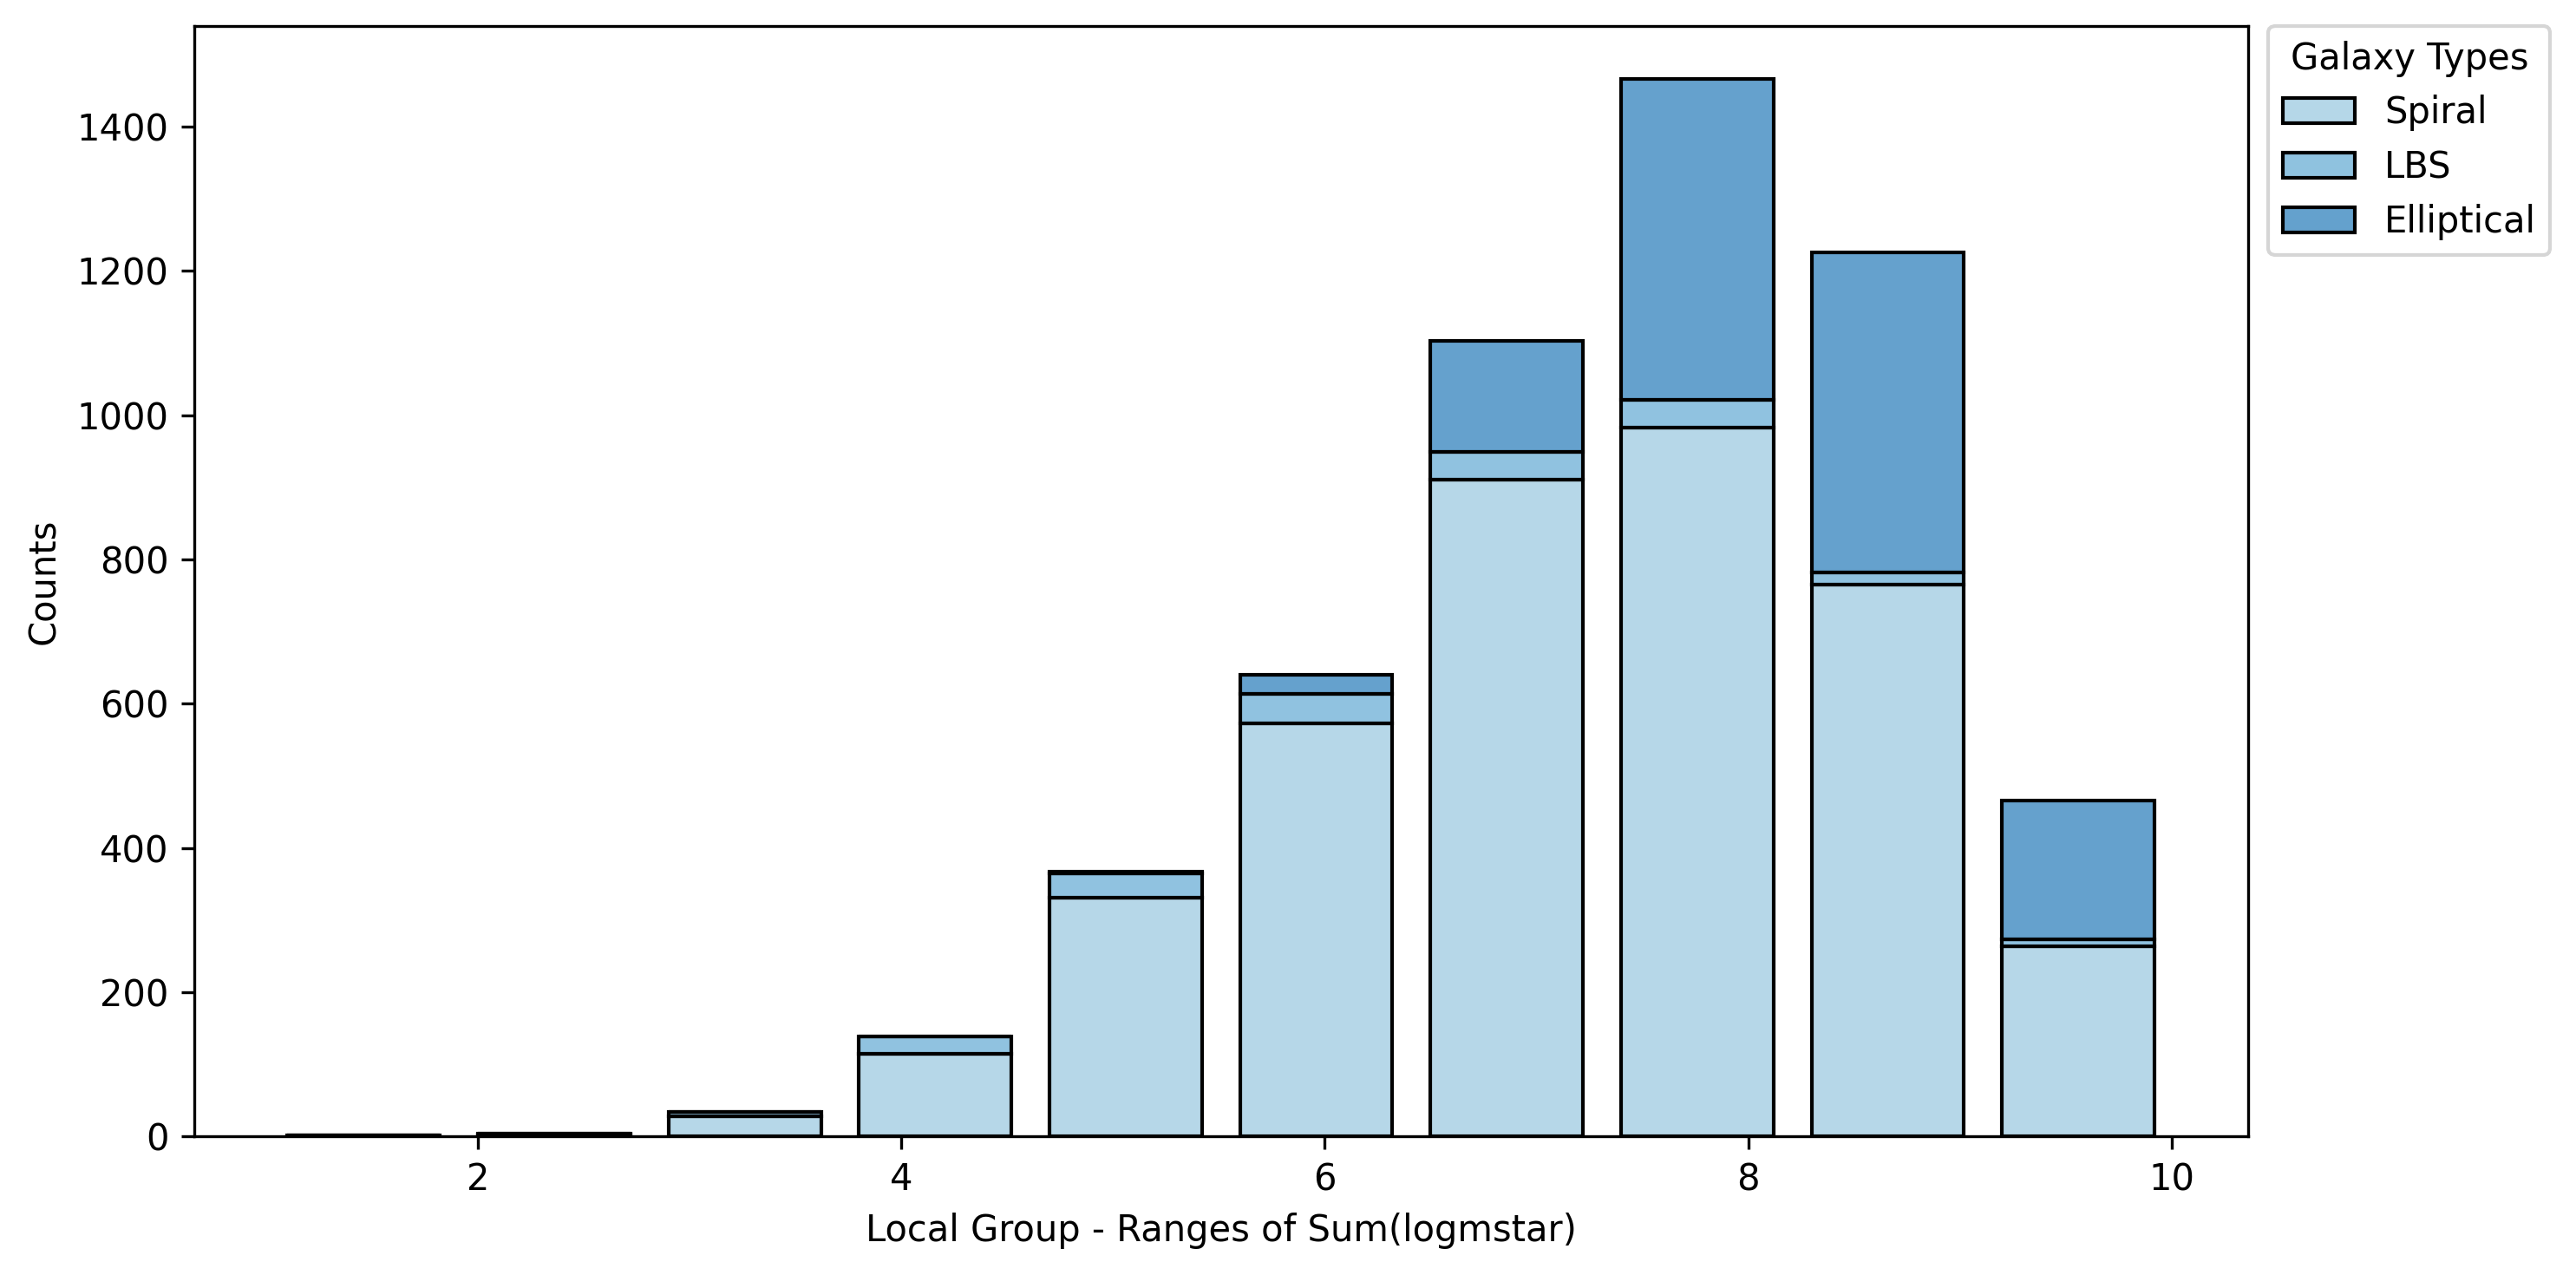

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:375: UserWarning: `bins` cannot be 'auto' when using weights. Setting `bins=10`, but you will likely want to adjust.
  warnings.warn(msg, UserWarning)


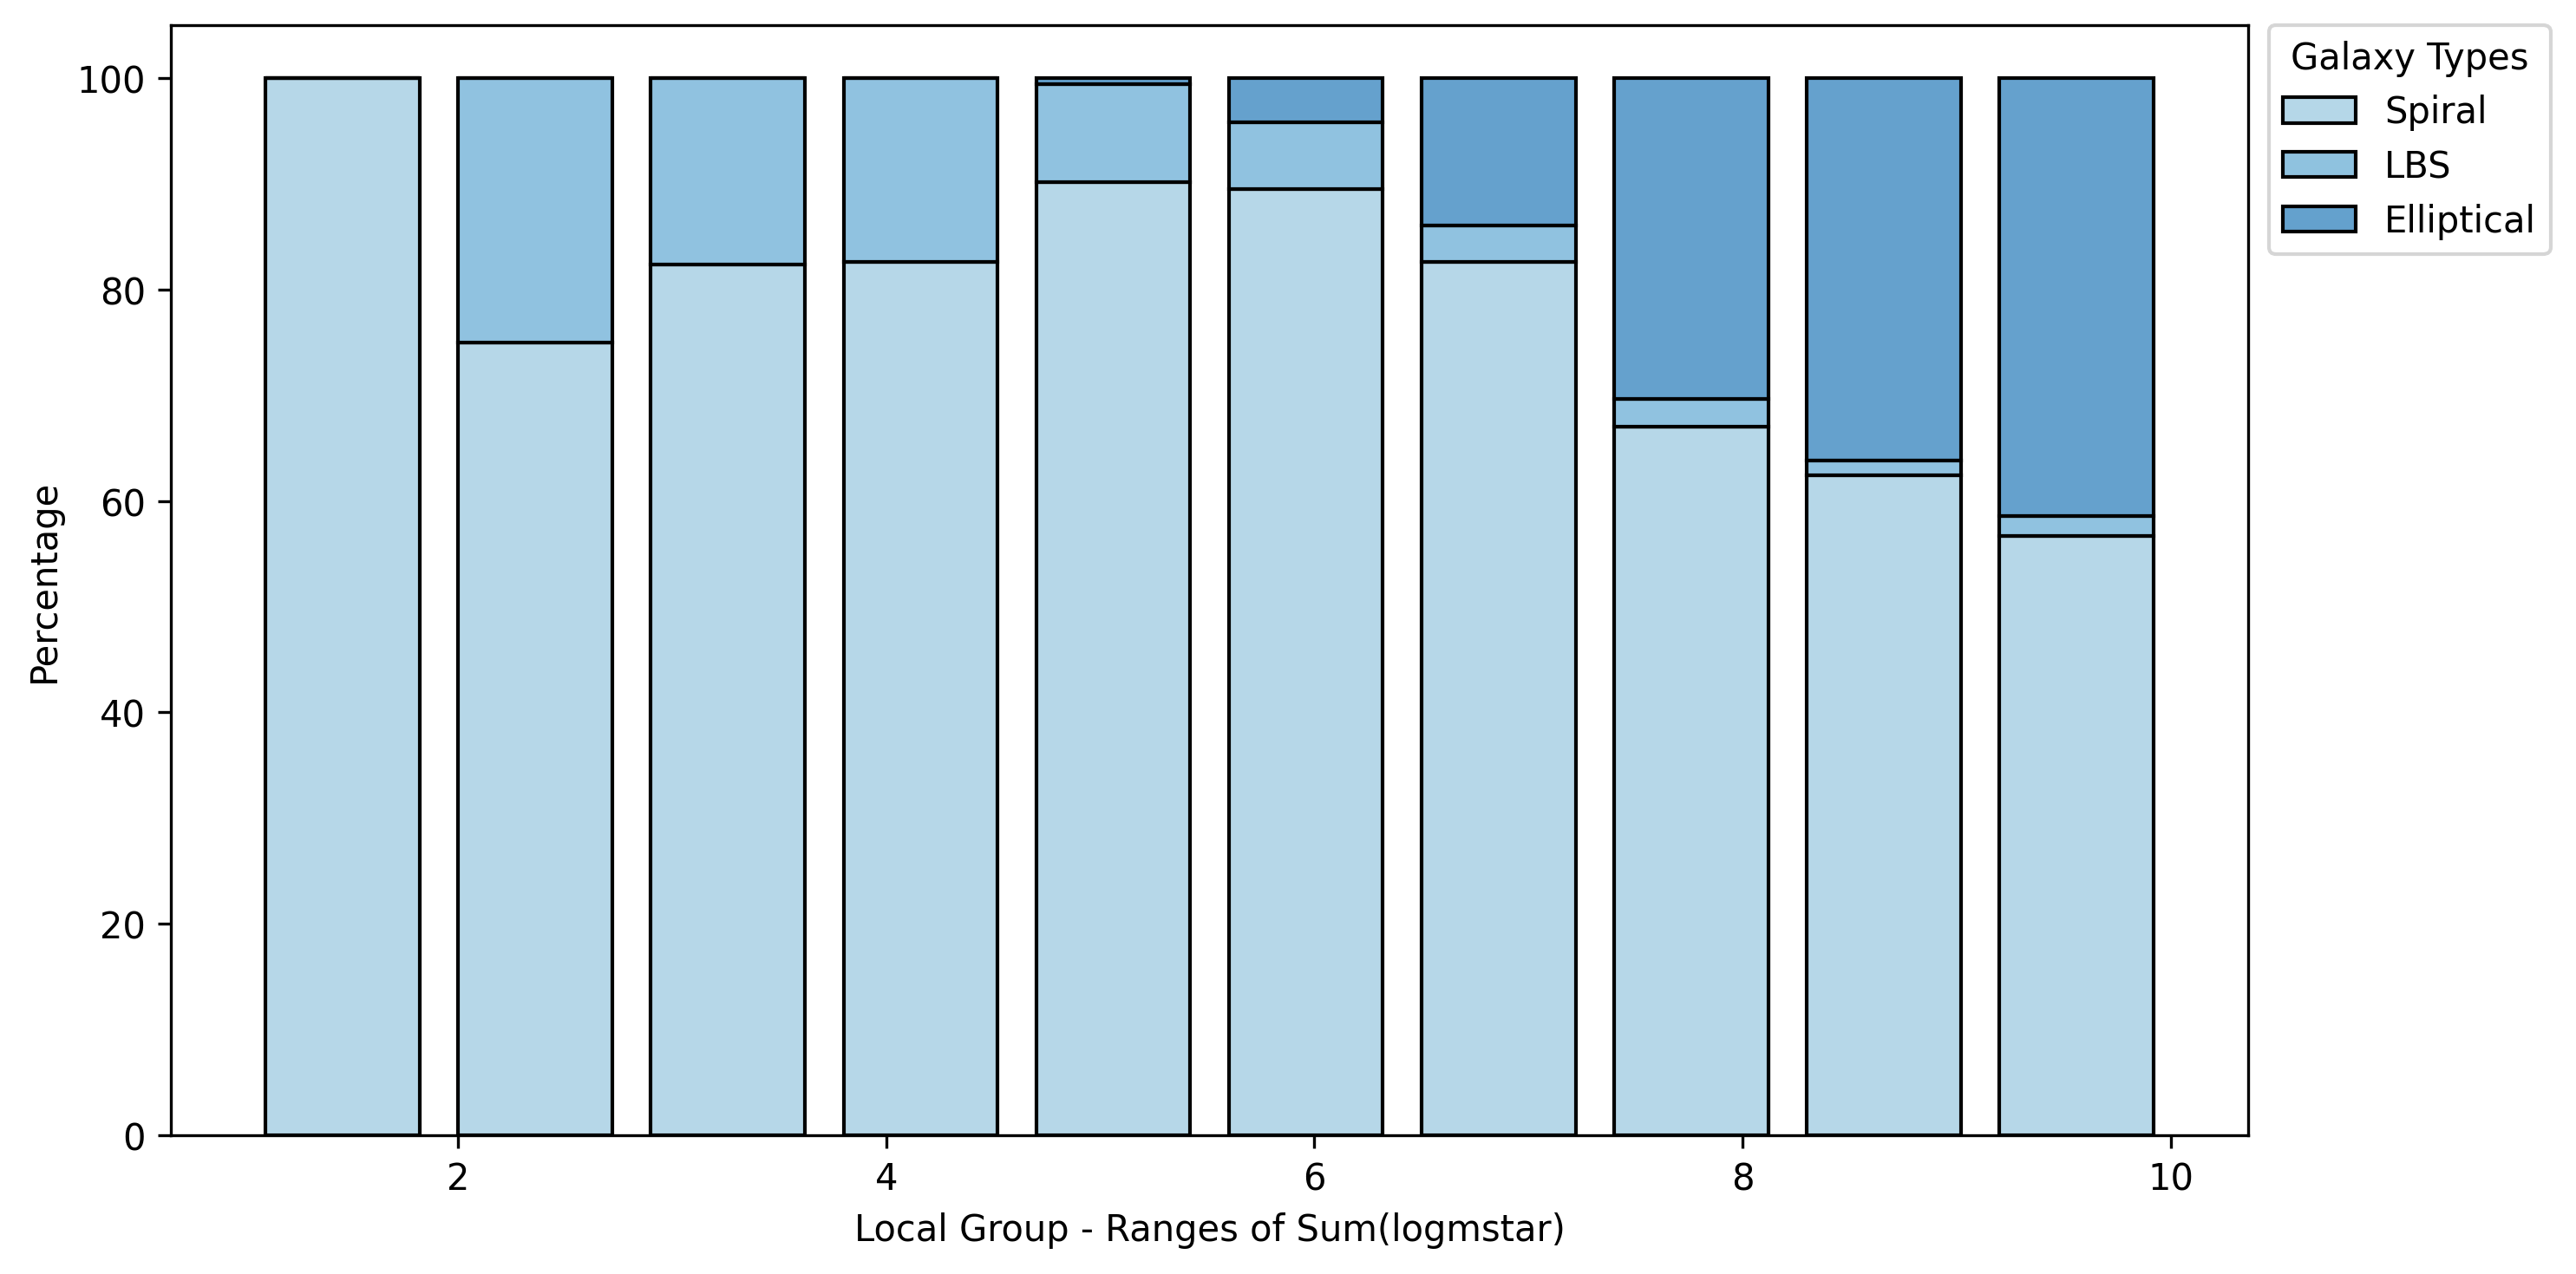

GroupGalTypes
      GroupID  ELLIPTICAL_CODE  Counts
0      100006                1      22
1      100006                2       1
2      100006               10      29
3      100017                1       9
4      100017               10      21
...       ...              ...     ...
3951   307986               10       2
3952   307994                2       1
3953   307994               10       1
3954   307998                2       1
3955   307998               10       1

[3956 rows x 3 columns]
GrpCounts
      GroupID  GrpCnts
0      100006       52
1      100017       30
2      100025       27
3      100044       45
4      100055       15
...       ...      ...
1972   301438        6
1989   301535        5
2028   301935        5
2032   301971        5
2127   302745        5

[337 rows x 2 columns]
Groups
     GroupID  ELLIPTICAL_CODE  Counts  GrpCnts         Ranges
0     100006                1      22       52   (45.5, 59.0]
1     100006                2       1       52   (45

KeyError: 'Counts'

In [1]:
from astropy.table import Table, join
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import pandas as pd
import statistics as st

#ForGroup = Table.read('../../GAMA_DATA/G3CFoFGroupv10.fits')
#print(f"ForGroup : {len(ForGroup)}")
## Clean Data

GroupGal = Table.read('../../GAMA_DATA/G3CGalv10.fits')
# Clean data
GroupGal = GroupGal[GroupGal['GroupID'] > 0 ]
print(f"GroupGal : {len(GroupGal)}")

StellarMasses = Table.read('../../GAMA_DATA/StellarMassesv19.fits')
# Clean Data
#StellarMasses = StellarMasses[StellarMasses['uminusr'] > 0.001]
#StellarMasses = StellarMasses[StellarMasses['logmstar'] > 0.001]
#StellarMasses = StellarMasses[StellarMasses['metal'] > 0.001]


StellarMasses = StellarMasses[StellarMasses['uminusr'] > 0.01]
StellarMasses = StellarMasses[StellarMasses['uminusr'] < 5]
StellarMasses = StellarMasses[StellarMasses['logmstar'] > 0.01]
StellarMasses = StellarMasses[StellarMasses['metal'] > 0.01]
StellarMasses = StellarMasses['CATAID','logmstar']
print(f"StellarMasses : {len(StellarMasses)}")

envMeasures = Table.read('../../GAMA_DATA/EnvironmentMeasuresv05.fits')
print(f"EnvMeasures : {len(envMeasures)}")
# Clean Data
envMeasures = envMeasures[envMeasures['SurfaceDensity'] < 50]
envMeasures = envMeasures[envMeasures['AGEDenParFlag'] == 0]
envMeasures = envMeasures[envMeasures['CountInCylFlag'] == 0]
print(f"EnvMeasures : {len(envMeasures)}")

#envClass = Table.read('../../GAMA_DATA/GalaxiesClassifiedv01.fits')
# Clean Data

visualMorph = Table.read('../../GAMA_Data/VisualMorphologyv03.fits')
print(f"visualMorph : {len(visualMorph)}")
print(visualMorph.colnames)
## Clean Data
#visualMorphElliptical = visualMorph[visualMorph['ELLIPTICAL_CODE'] == 1]
#visualMorphSpiral = visualMorph[visualMorph['ELLIPTICAL_CODE'] == 10]
visualMorph = visualMorph[visualMorph['ELLIPTICAL_CODE'] != 0]
visualMorph = visualMorph[visualMorph['ELLIPTICAL_CODE'] < 50]

GalTables = join(visualMorph,StellarMasses,keys='CATAID',join_type='inner')

DataLocalGroups = join(GroupGal,GalTables,keys='CATAID',join_type='inner')
print('Joining envMeasures VisualMorph '+str(len(DataLocalGroups)))
print(len(DataLocalGroups))
print(DataLocalGroups.colnames)

import math
# Sum logmstar over Local Group
DLG_Groups = DataLocalGroups.group_by('GroupID')

GroupMass = DLG_Groups['GroupID','logmstar'].groups.aggregate(lambda x: math.log10(np.sum(10**x)))
print("GroupMass")
print(GroupMass.colnames)

LocalGroupsSumMass = join(DataLocalGroups,GroupMass,keys='GroupID',join_type='inner')
print("LocalGroupsSumMass")
print(LocalGroupsSumMass.colnames)
print(LocalGroupsSumMass)

n = 10
r = 3
xfield = 'logmstar_2'
df2 = LocalGroupsSumMass.to_pandas()

# logmstar_2 is sum of logmstar_1 
#df2 = df[['ELLIPTICAL_CODE',xfield]]
df2['MassRanges'] = pd.cut(df2[xfield], n)
#print(df2)

GalCounts = df2.groupby(['MassRanges','ELLIPTICAL_CODE']).size().reset_index(name='Counts')
print('GalCounts')
print(GalCounts)

print(list(GalCounts.columns))

lst = []
for i in range(1,n+1) :
  lst = lst + [i]*r 
print(lst)
GalCounts['Range']=lst
print(GalCounts)

GalCounts['Percent']=100*GalCounts['Counts']/GalCounts.groupby(['Range','ELLIPTICAL_CODE'])['Counts'].transform('sum')
print('GalCounts')
print(GalCounts)

SO = GalCounts.groupby(['Range', 'ELLIPTICAL_CODE']).agg({'Counts': 'sum'})
print('SO')
print(SO)
Range = GalCounts.groupby(['Range']).agg({'Counts': 'sum'})
print('Range')
print(Range)
SR=SO.div(Range, level='Range') * 100
print('SR')
print(SR)


#state_office = df.groupby(['state', 'office_id']).agg({'sales': 'sum'})
#state = df.groupby(['state']).agg({'sales': 'sum'})
#state_office.div(state, level='state') * 100


alphaVal = .3
binCount = 100
 
fig = plt.figure(figsize=(10, 5), dpi=300)   
g=sns.histplot(GalCounts, x='Range', hue='ELLIPTICAL_CODE', weights='Counts',
             multiple='stack', palette='tab20c', shrink=0.8)
#g.set_title('Local Group : Galaxy Type by range of sum(logmstar)', fontsize = 20, y =1.05);
g.set_xlabel('Local Group - Ranges of Sum(logmstar)')
g.set_ylabel('Counts')
#g.set_xlim([1,7])
#g.set(xticklabels=[])

plt.legend(title='Galaxy Types', loc='upper left', labels=['Spiral', 'LBS','Elliptical'],
           bbox_to_anchor=(1.01,1), borderaxespad=0)

#plt.rcParams["figure.figsize"]=(6,12)
fig.tight_layout()
fig.savefig('../../ChartsPlots/Histogram_GalaxyTypes_Range_Sum_logmstar.png', dpi=300, bbox_inches='tight')                      
plt.show(g)

fig = plt.figure(figsize=(10, 5), dpi=300) 
g=sns.histplot(SR, x='Range', hue='ELLIPTICAL_CODE', weights='Counts',
             multiple='stack', palette='tab20c', shrink=0.8)
#g.set_title('Local Group : Galaxy Type Percentages by range of sum(logmstar)', fontsize = 20, y =1.05);
g.set_xlabel('Local Group - Ranges of Sum(logmstar)')
g.set_ylabel('Percentage')
#g.set_xlim([1,7])
#g.set(xticklabels=[])

plt.legend(title='Galaxy Types', loc='upper left', labels=['Spiral', 'LBS','Elliptical'],        
  bbox_to_anchor=(1.01, 1), borderaxespad=0)
#plt.rcParams["figure.figsize"]=(6,12)
fig.tight_layout()
fig.savefig('../../ChartsPlots/Histogram_Percentage_Tange_Sum_logmstar.png', dpi=300, bbox_inches='tight')                      
plt.show(g)


GrpGalTypes = join(GroupGal,visualMorph,keys='CATAID',join_type='inner')
df3 = GrpGalTypes.to_pandas()

GroupGalTypes = df3.groupby(['GroupID','ELLIPTICAL_CODE']).size().reset_index(name='Counts')
print('GroupGalTypes')
print(GroupGalTypes)

GrpCounts = df3.groupby(['GroupID']).size().reset_index(name='GrpCnts')
GrpCounts = GrpCounts[GrpCounts['GrpCnts']>= 5]
print('GrpCounts')
print(GrpCounts)

Groups = pd.merge(GroupGalTypes,GrpCounts)

Groups['Ranges'] = pd.cut(Groups['GrpCnts'], n)
print('Groups')
print(Groups)
GalCounts = Groups.groupby(['Ranges','ELLIPTICAL_CODE']).size().reset_index()
print('GalCounts')
print(GalCounts.index)
print(GalCounts)
exit
lst = []
for i in range(1,n+1) :
  lst = lst + [i]*r 
print(lst)
GalCounts['Range']=lst
print(GalCounts)
GalCounts.reset_index()

#Groups['Percent']=100*GalCounts['Counts']/GalCounts.groupby(['Range','ELLIPTICAL_CODE'])['GrpCnts'].transform('sum')
#print('GalCounts')
#print(GalCounts)
GalCounts['Percent'] = 100*GalCounts['Counts']/GalCounts['GrpCnts']
#Groups['Percent']=100*Groups['Counts']/GalCounts.groupby(['Ranges','ELLIPTICAL_CODE'])['Counts'].transform('sum')
print('GalCounts')
print(GalCounts)


SO = GalCounts.groupby(['Range', 'ELLIPTICAL_CODE','Percent']).agg({'Counts': 'sum'}).reset_index()
#SO = GalCounts.groupby(['Range', 'ELLIPTICAL_CODE'])
print('SO')
print(SO)


#Range = Groups.groupby(['Range']).agg({'Counts': 'sum'})
#print('Range')
#print(Range)
#SR=SO.div(Range, level='Range') * 100
#print('SR')
#print(SR)





#SP= SO.groupby(['Ranges'])
#print(SP)

#Groups = pd.merge(GroupGalTypes,GrpCounts)
#Groups['percent'] = 100*Groups['Counts']/Groups['GrpCnts']

#print('Groups')
#print(Groups)


#GroupGalTypes['percent']=100*GroupGalTypes['Counts']/GroupGalTypes.groupby(['GroupID','ELLIPTICAL_CODE'])['Counts'].transform('sum')
#print(GroupGalTypes)

#GroupGalCounts = df2.groupby(['GroupID']).size().reset_index(name='GrpCount')
#print('GroupGalCounts')
#print(GroupGalCounts)

#GroupInfo = join(visualMorph,StellarMasses,keys='CATAID',join_type='inner')




